<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Chapter7_unsupervised_ML_02_classification__decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic 2: Decision Trees

**Dataset variables:**

*   survival -->	Whether a passenger survived or not
*   pclass -->	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
*   sex -->	Sex
*   Age -->	Age in years
*   sibsp -->	# of siblings / spouses aboard the Titanic
*   parch -->	# of parents / children aboard the Titanic
*   ticket -->	Ticket number
*   fare -->	Passenger fare
*   cabin -->	Cabin number
*   embarked -->	Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## 1. Read the data

In [23]:
import pandas as pd

url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

## 2. Define X and y

In [24]:
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
y = X.pop("Survived")

## 3. Data Splitting (Train - Test)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

## 4. Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

In [26]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

ValueError: could not convert string to float: 'male'

**We got an error**: the model cannot deal with categorical features. We will soon learn to encode them as numbers, but our approach should always be to quickly complete the task  first, and iterate to improve it later. This is the reason why we will simply start by dropping the categorical features.

## 5. Select only numerical features


In [27]:
# another option: X_num = X.drop(columns=["Sex", "Cabin", "Embarked"])
X_num = X.select_dtypes(include="number")

### 5.1. Train-test split

Since we created a new dataframe without the categorical features, we need to create our test and train sets again.

In [9]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=123)

### 5.2. Implement a Decision Tree (numerical features)

In [28]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_num_train, y=y_train)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Another error**: the model cannot deal with missing data. Let's fix it.

## 6. Dealing with missing data

We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

Simple imputer allows these strategies:
- mean (default),
- median,
- most frequent,
- constant.

For more details, look here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [29]:
from sklearn.impute import SimpleImputer

Follow this approach for different types of estimators:
1. initialize,
2. use fit on the **train** set,
3. use transform on the **train** set,
4. use transform on the **test** set.

It is possible to combine steps 2 and 3 and use fit_transform instead.

In [30]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [31]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [32]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [33]:
X_num_imputed_train.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

NO DATA SNOOPING!

We will implement the 4th step in 7.1.

### 6.1. Implement a Decision Tree (numerical features + missing values imputed)

In [34]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier()

### 6.2. Make predictions and check accuracy on the train set

In [35]:
# make predictions
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

In [36]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

0.9339887640449438

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## 7. Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

### 7.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [37]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_num_test)

### 7.2. Make predictions on the test set

In [38]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

### 7.3. Check accuracy score on the test set

In [39]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.5251396648044693

This accuracy is even lower than some of our intuition-based models...

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

## 8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

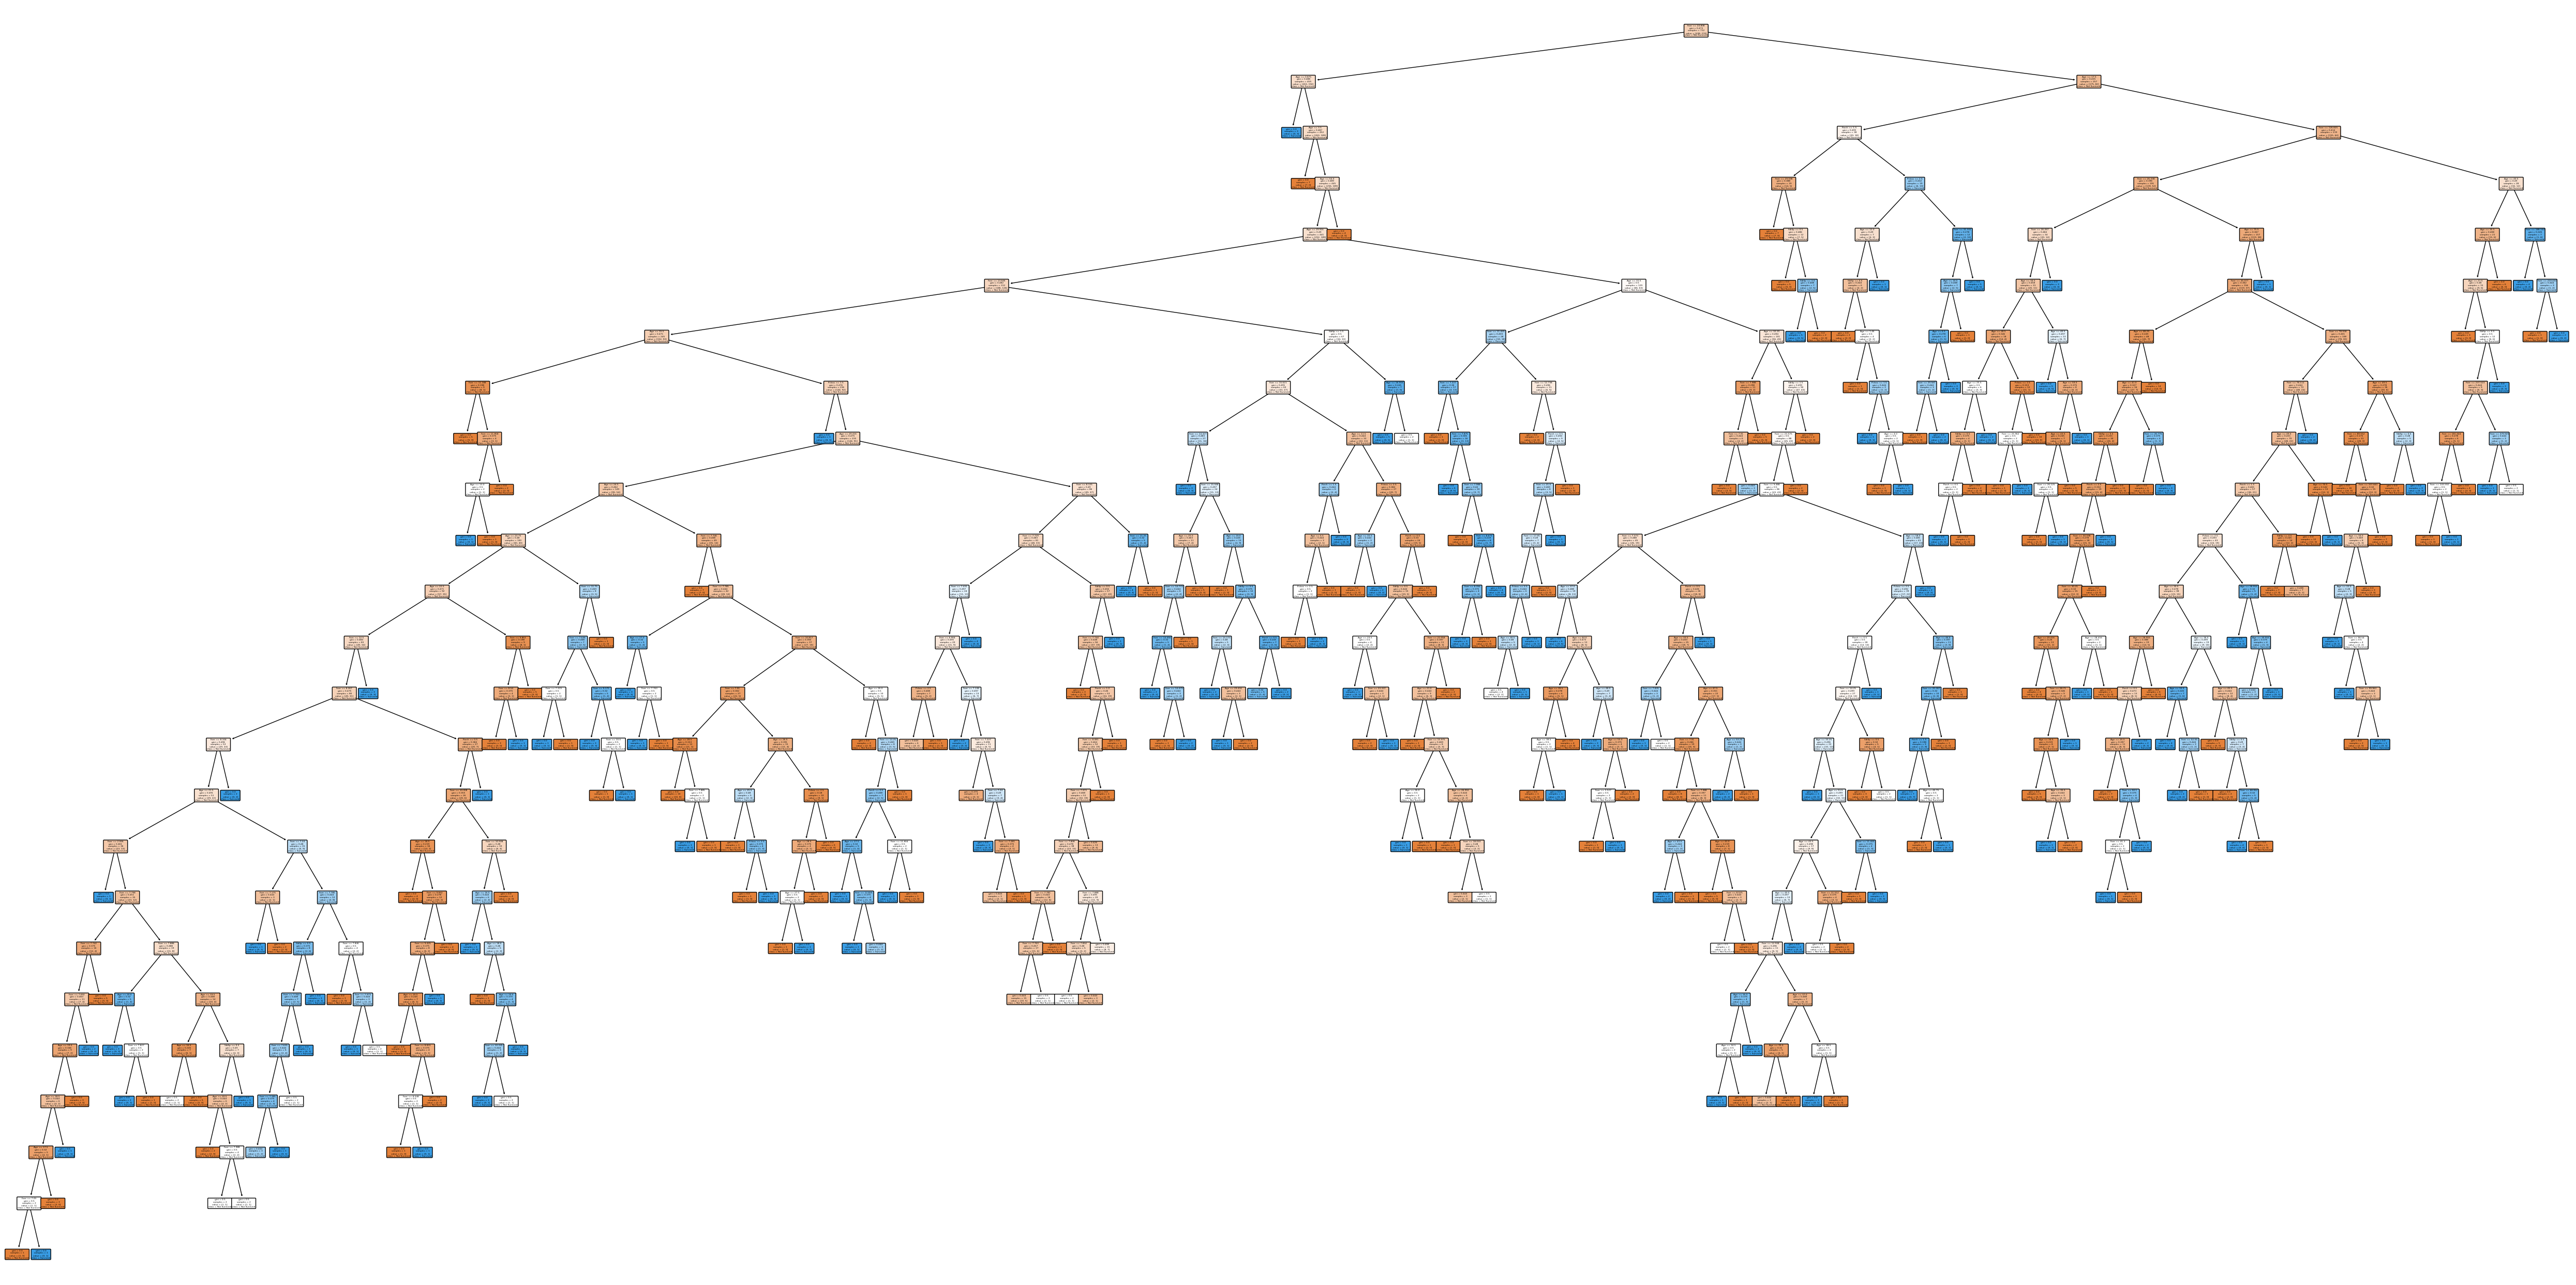

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=X_num.columns
     );

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is **very complex**, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

### **Exercise 1**: Pruning the tree

1. Tweak the parameters `max_depth` and `min_samples_leaf` of the decision tree, based on the Scikit-Learn documentation and the Statquest videos you watched following the Learning Platform.
2. Try to make the tree smaller.
3. Visualize again the tree.
4. Check the performance of your "small tree" on the train & test sets.

class **sklearn.tree.DecisionTreeClassifier** (*, criterion='gini', splitter='best', max_depth =None, min_samples_split=2,  min_samples_leaf =1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [41]:
# 2. initialize the model (optional: give some parameters)
my_tree_01 = DecisionTreeClassifier(max_depth =3, min_samples_leaf =3)

# 3. fit the model to the train data
my_tree_01.fit(X=X_train, y=y_train)

ValueError: could not convert string to float: 'male'

In [42]:
X_num = X.select_dtypes(include="number")
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=123)

In [43]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree_01 = DecisionTreeClassifier(max_depth =3, min_samples_leaf =3)

# 3. fit the model to the train data
my_tree_01.fit(X=X_num_train, y=y_train)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [45]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [46]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [47]:
X_num_imputed_train.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [48]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree_01 = DecisionTreeClassifier(max_depth =3, min_samples_leaf =3)

# 3. fit the model to the train data
my_tree_01.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

# check accuracy for the test set

In [49]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_num_test)

In [51]:
y_pred_tree_test = my_tree_01.predict(X_num_imputed_test)

In [52]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.7374301675977654

# Plotting the deision tree

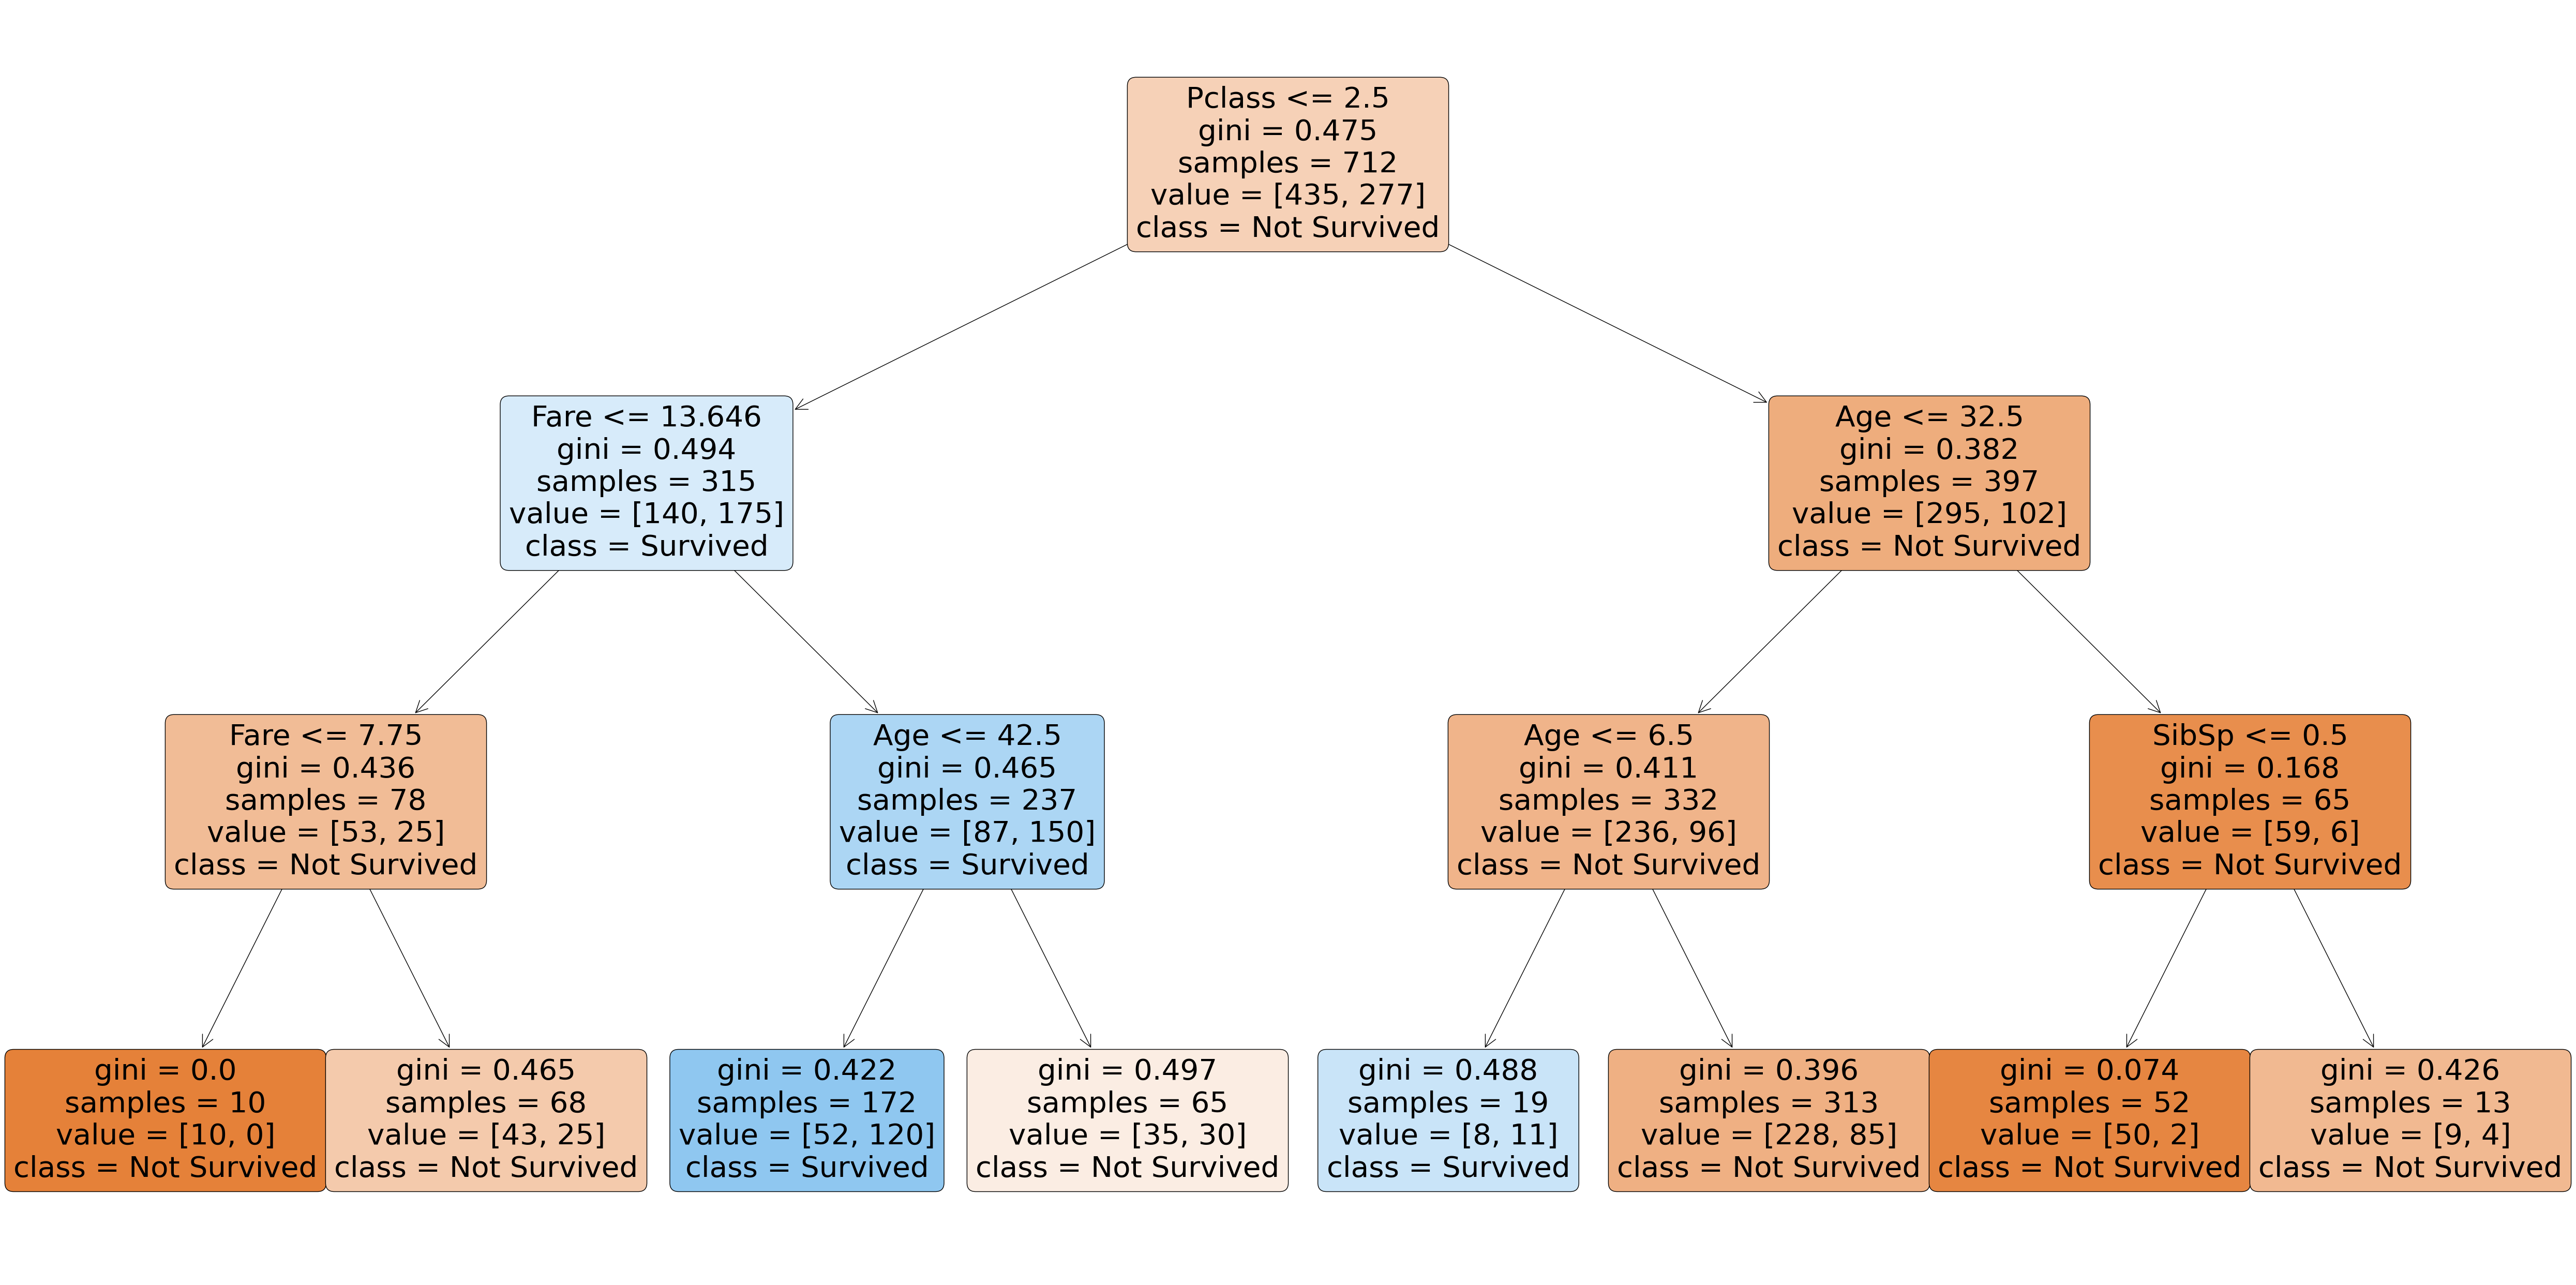

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree_01,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=X_num.columns
     );

**DecisionTreeClassifier (max_depth =3, min_samples_leaf =3)**

**max_depth** *int, default=None*

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf** *int or float, default=1*

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

## **Your challenge**

In a new notebook, apply everything you have learned here to the Housing project.


# 1.   **Data reading & first glance**

### how to get the url and the correct path of the .csv file

-- download teh dataset from the Learning Platform

-- upload the .csv filt to Google Drive

-- find the file on the Google Drive website and the choose 'open with Google sheet'

!!! how to set the "share" --> anyone on the internet with the link can open it (bcz default is only me can read it)

In [59]:
# 1st way
import pandas as pd
url = "https://drive.google.com/file/d/19RhD0QK2yjh-A9DrM9kBEeQQ-HlFhZdD/view?usp=sharing" # the .csv file is already uploaded from local server to the colad in google drive. In colab notebook, 'share' --> anyone with the link --> 'copy the link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(path)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [60]:
# 2nd way
# Get the spreadsheet ID and name
import pandas as pd
sheet_id = "174SyAAmQ2npIDZ1z19HUB5eJgUBuOU4zYLThy4uVdmc"
sheet_name = "1492222829"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
data = pd.read_csv(url)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [61]:
data.dtypes

LotArea           int64
LotFrontage     float64
TotalBsmtSF       int64
BedroomAbvGr      int64
Fireplaces        int64
PoolArea          int64
GarageCars        int64
WoodDeckSF        int64
ScreenPorch       int64
Expensive         int64
dtype: object

### the target column (what we want our model to predict) is usually denoted as ***y*** and we call it a ***label***. We will 'pop' it out from the rest of the data:

In [62]:
y = data.pop("Expensive")

In [63]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

### the "feature vector" (the column used to predict the target) is denoted as ***x***.

### some of the columns in the original dataset are unique identifiers of each passenger. Unique identifiers aare not useful when it comes to finding patterns in the data. So, the first step when building our x, the vctor of predictor features, is to drop them:


In [64]:
data.head()

LotArea  LotFrontage  TotalBsmtSF  BedroomAbvGr  Fireplaces  PoolArea  \
0     8450         65.0          856             3           0         0   
1     9600         80.0         1262             3           1         0   
2    11250         68.0          920             3           1         0   
3     9550         60.0          756             3           1         0   
4    14260         84.0         1145             4           1         0   

   GarageCars  WoodDeckSF  ScreenPorch  
0           2           0            0  
1           2         298            0  
2           2           0            0  
3           3           0            0  
4           3         192            0

In [65]:
#if there is nothing to drop then X=data
#X = data.drop(columns=["PassengerId", "Name", "Ticket"])
X = data
X.head()

LotArea  LotFrontage  TotalBsmtSF  BedroomAbvGr  Fireplaces  PoolArea  \
0     8450         65.0          856             3           0         0   
1     9600         80.0         1262             3           1         0   
2    11250         68.0          920             3           1         0   
3     9550         60.0          756             3           1         0   
4    14260         84.0         1145             4           1         0   

   GarageCars  WoodDeckSF  ScreenPorch  
0           2           0            0  
1           2         298            0  
2           2           0            0  
3           3           0            0  
4           3         192            0

# 2.   **Basic Exploration**



In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [69]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

### **LotFrontage** column has 259 NaN values then we have to first deal with this missing values



In [70]:
from sklearn.impute import SimpleImputer

In [71]:
# 0. define the X_num_train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [72]:
X_num = X.select_dtypes(include="number")

In [74]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=123)

In [75]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [76]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [77]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [78]:
X_num_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [79]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier()

### check accuracy for the test set

In [80]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_num_test)

In [81]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

In [82]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8835616438356164

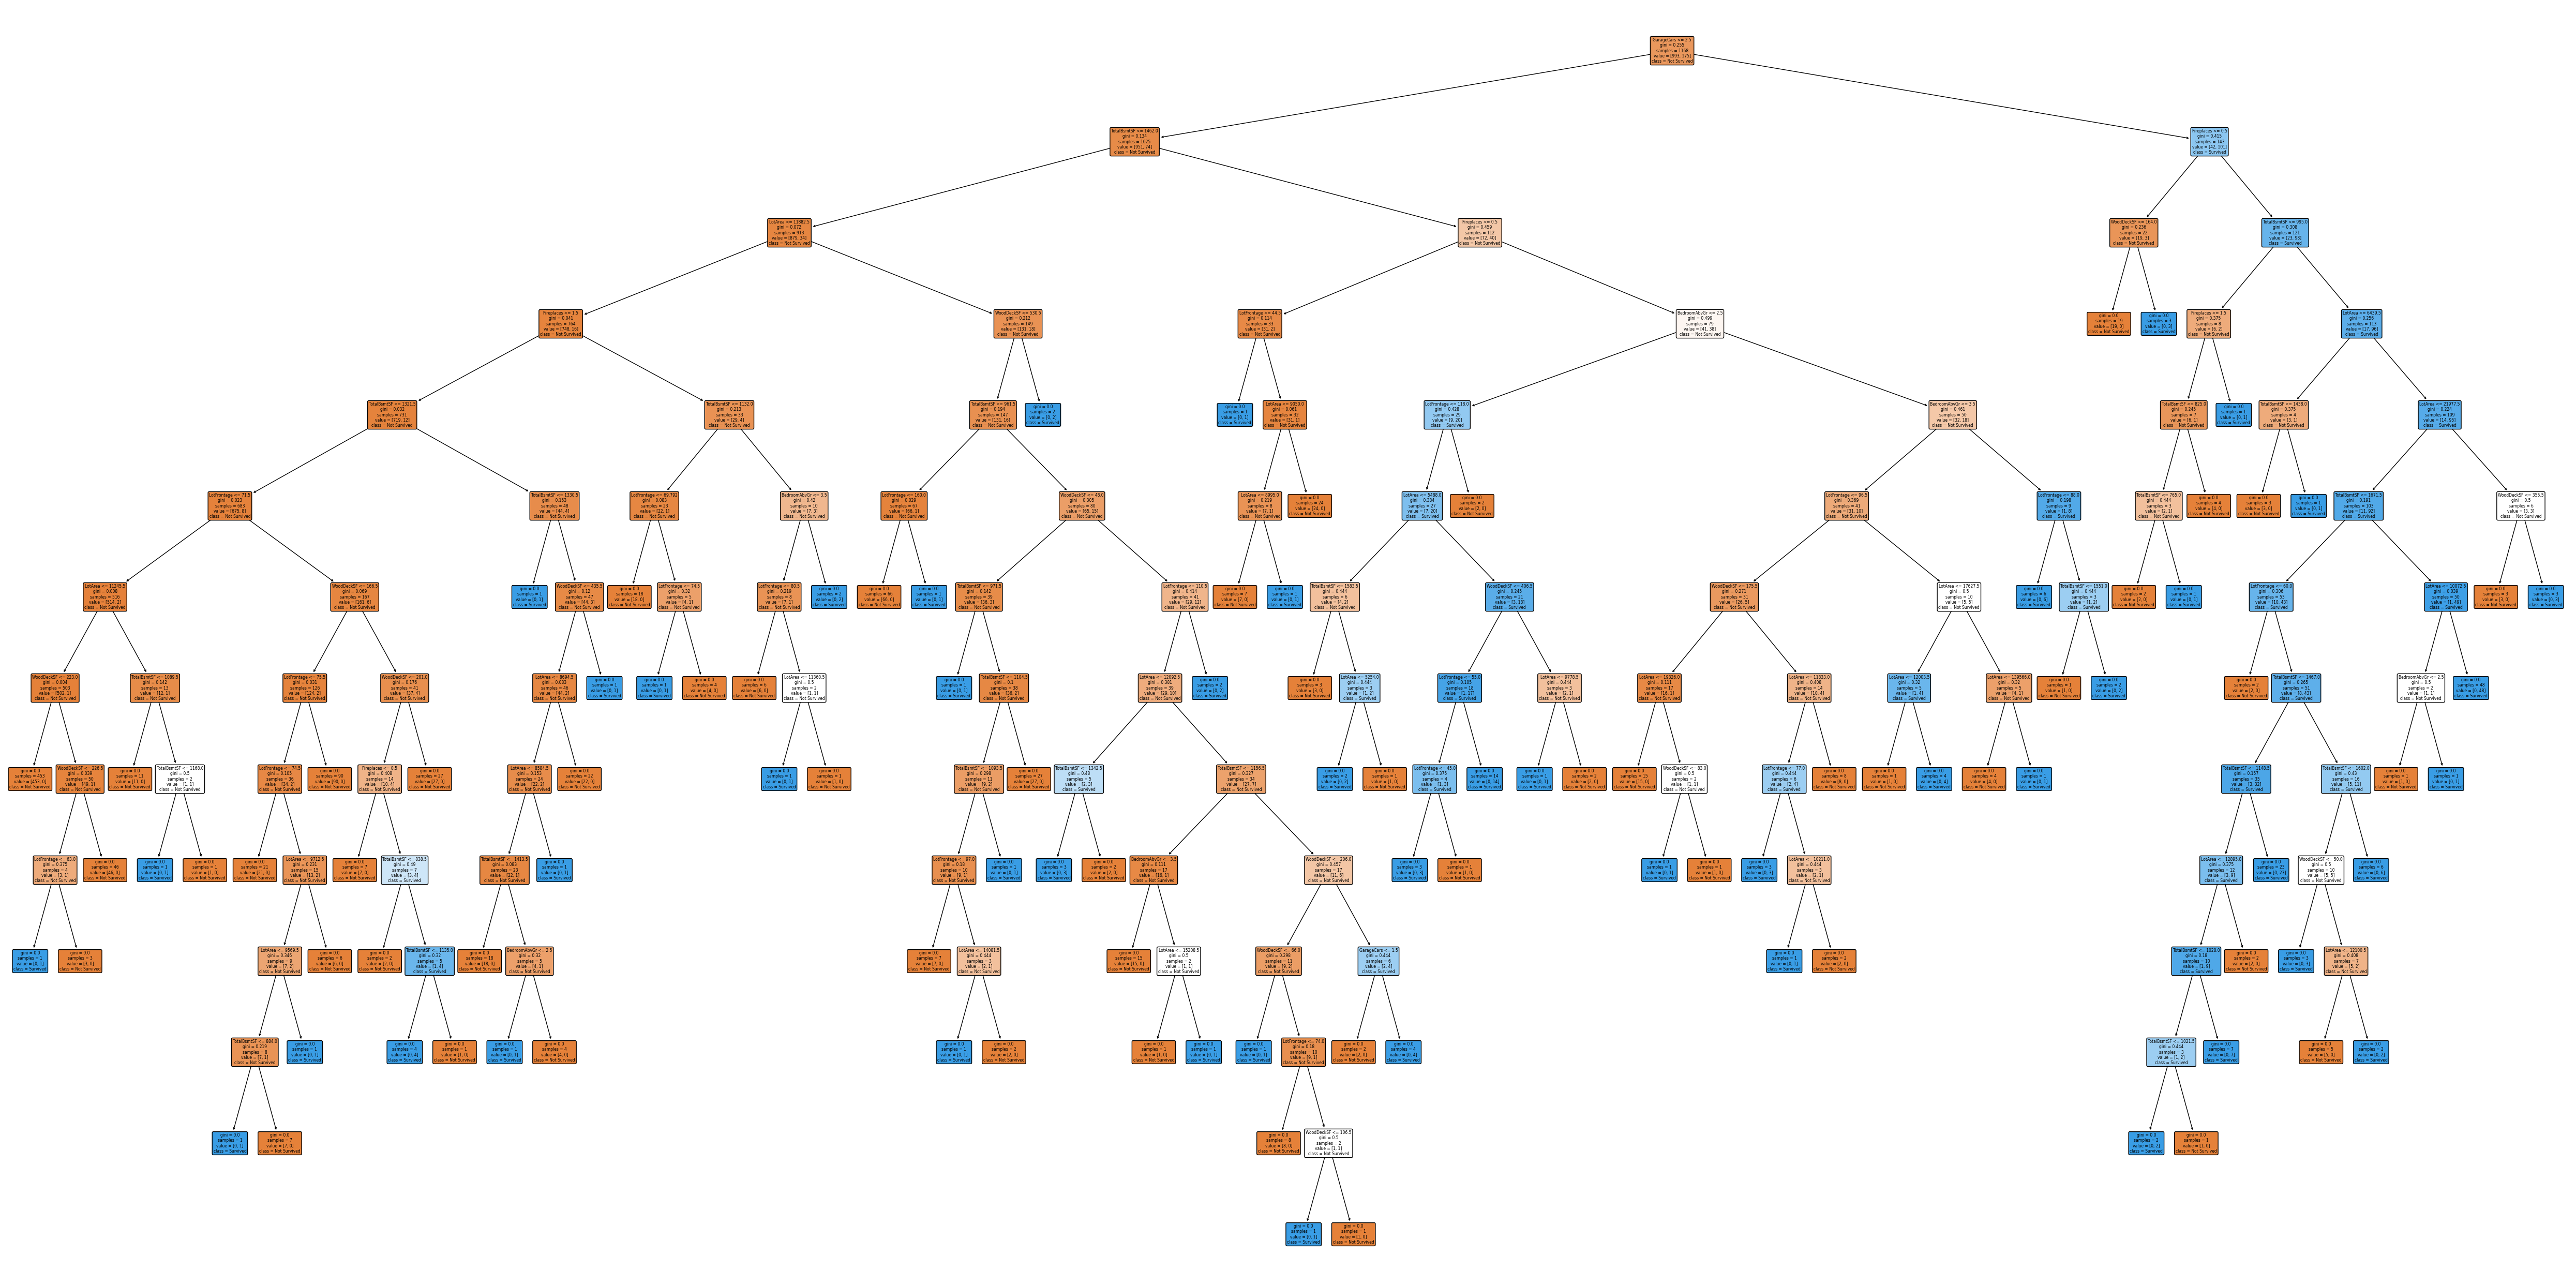

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=X_num.columns
     );

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is very complex, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

In [84]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth =3, min_samples_leaf =3)

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

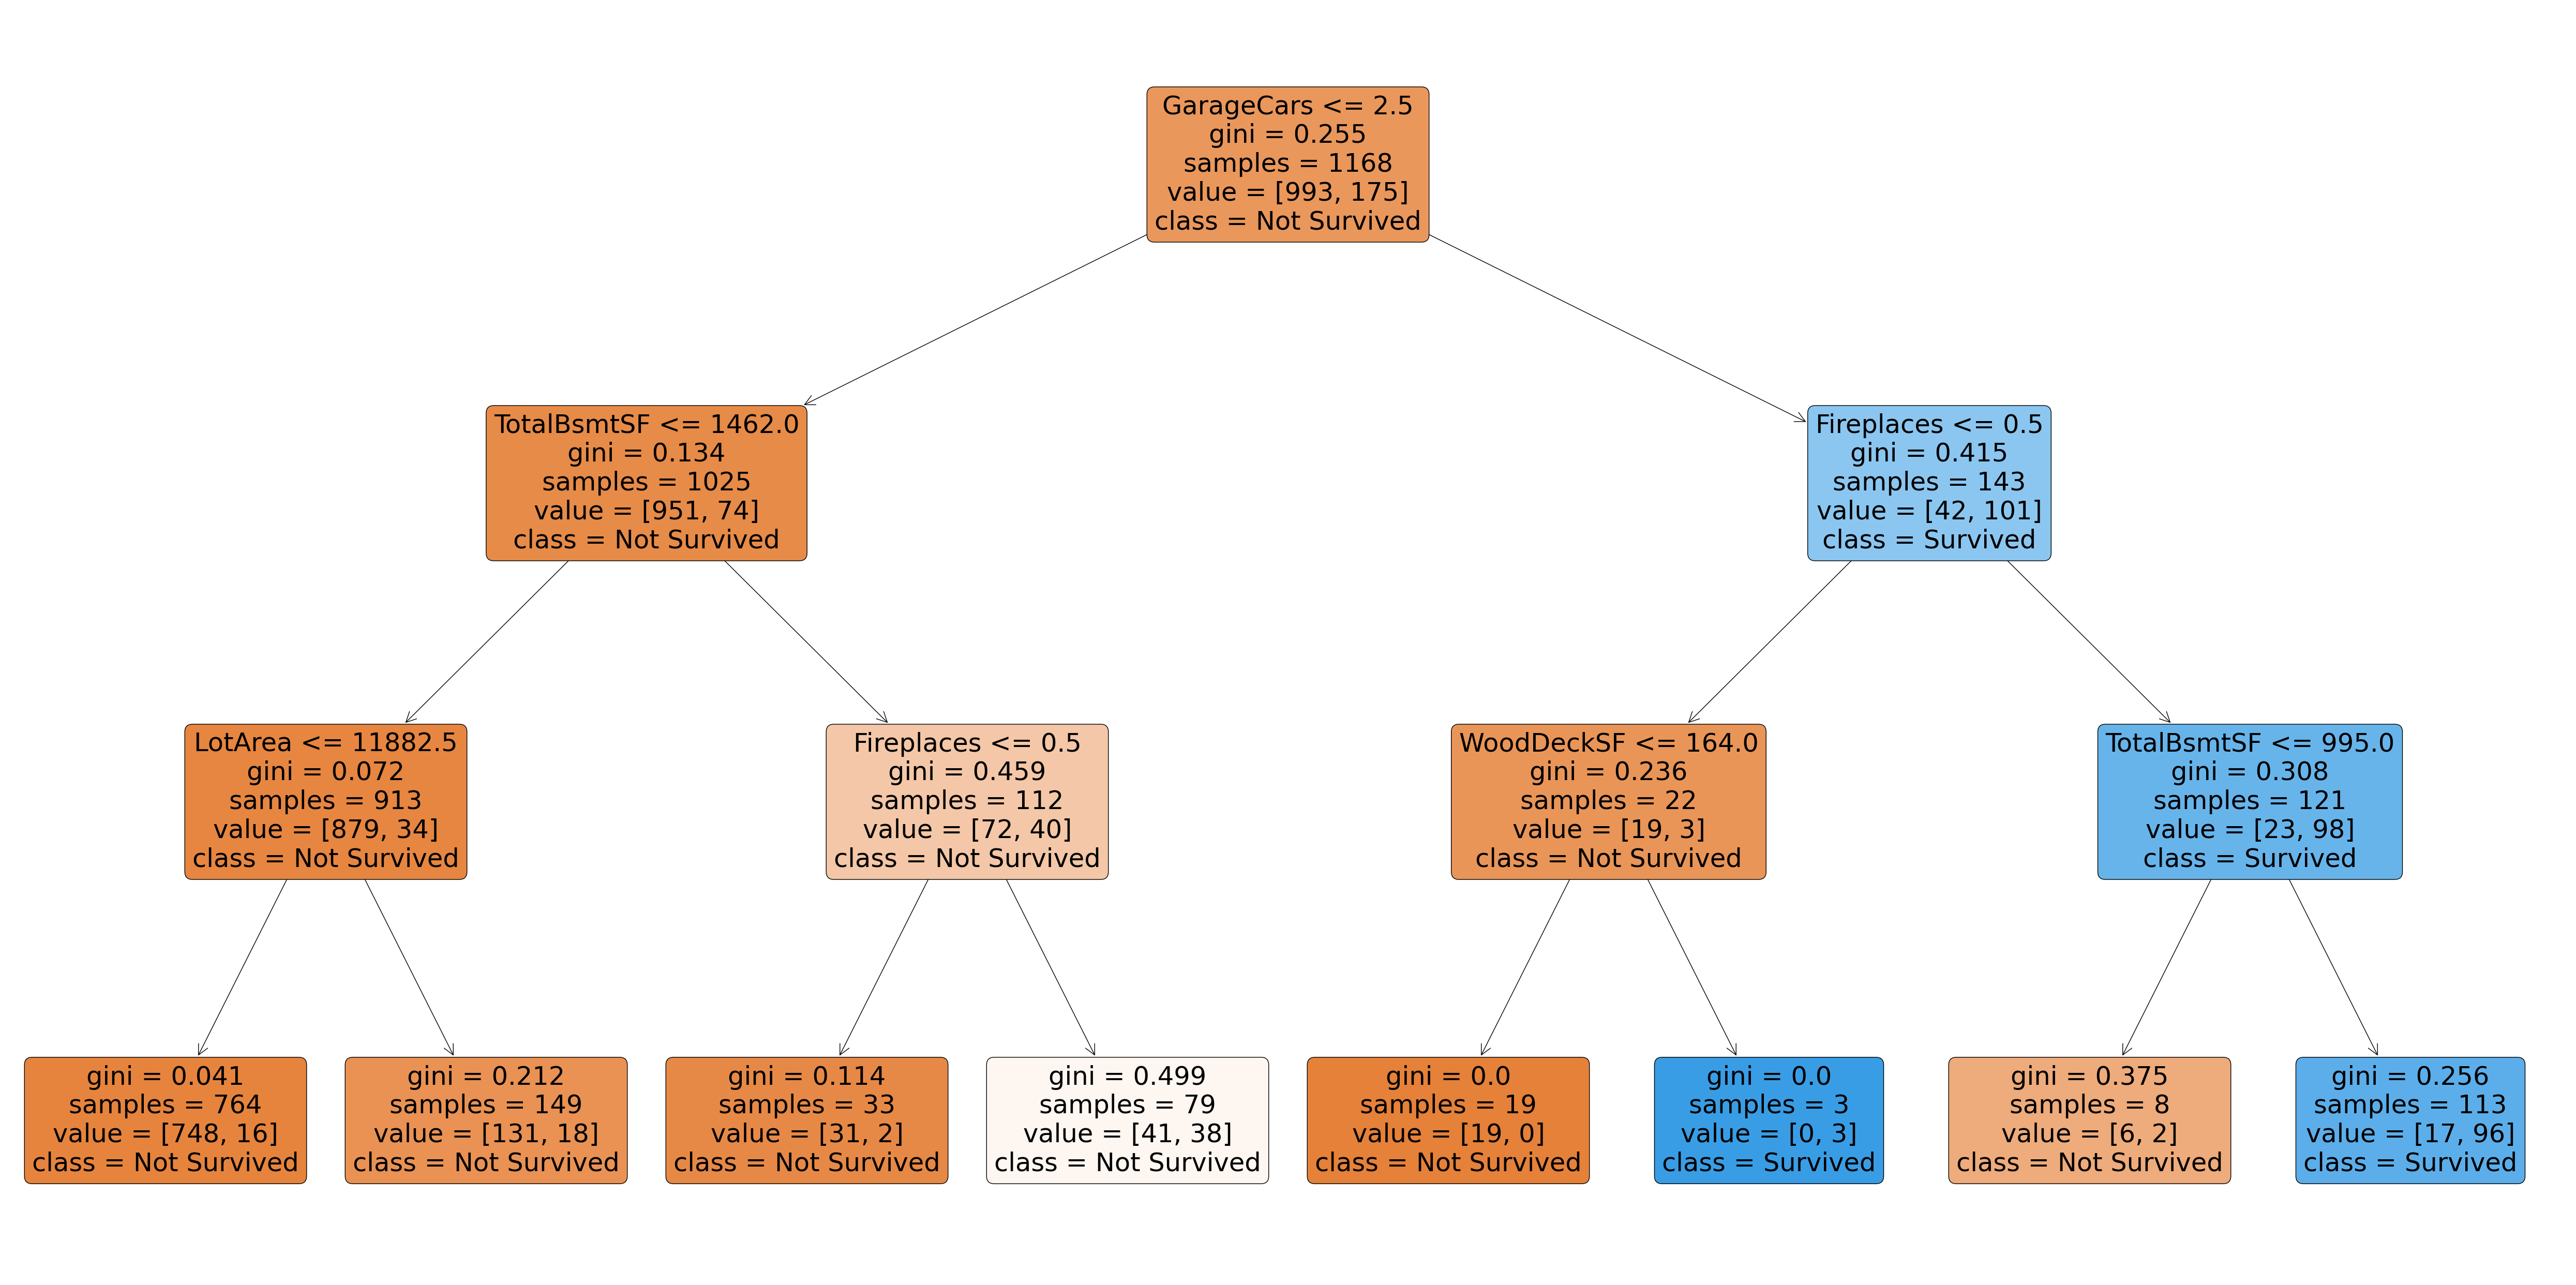

In [85]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=X_num.columns
     );